#k200353 Mohsin Ali Mirza DLP Lab

#Libraries

In [ ]:
!python --version
!sudo apt-get update -y

Python 3.9.16
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal/main amd64 Packages [1,206 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Fetched 1,560 kB in 2s (922 kB/s)
Reading package lists... Done


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import itertools
import pandas as pd
import numpy as np
import tensorflow
import keras
import re
import os
from tqdm import tqdm

# Drawing the embeddings
import matplotlib.pyplot as plt

# Deep learning:
#from keras.models import Input, Model
from keras.layers import Dense

from scipy import sparse

#Custom Functions

In [ ]:
import re
import numpy as np

def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict

def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will','is','and','the','for','with','in','over','at','the','has','a','of','always','to']
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

# Functions to find the most similar word
def euclidean(vec1:np.array, vec2:np.array) -> float:
    """
    A function to calculate the euclidean distance between two vectors
    """
    return np.sqrt(np.sum((vec1 - vec2)**2))

def find_similar(word:str, embedding_dict:dict, top_n=10)->list:
    """
    A method to find the most similar word based on the learnt embeddings
    """
    dist_dict = {}
    word_vector = embedding_dict.get(word, [])
    if len(word_vector) > 0:
        for key, value in embedding_dict.items():
            if key!=word:
                dist = euclidean(word_vector, value)
                dist_dict.update({
                    key: dist
                })

        return sorted(dist_dict.items(), key=lambda x: x[1])[0:top_n]

In [ ]:
# Reading the text from the input folder

texts = pd.read_csv('input/sample.csv')
texts = [x for x in texts['text']]

In [ ]:
import re

def clean_text(
    string: str,
    punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~''',
    stop_words=['the', 'a', 'and', 'is', 'be', 'will']) -> str:
    """
    A method to clean text
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    for x in string.lower():
        if x in punctuations:
            string = string.replace(x, "")

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stop_words])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    return string

Do the preprocessing filter out the stop words such as the and then create the (X,Y) pair which is saved in the word_lists array, whereas the all_text only contatins the words without the stopiing words

In [ ]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text):
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])


print(word_lists)

[['future', 'king'], ['future', 'prince'], ['king', 'prince'], ['king', 'future'], ['prince', 'king'], ['prince', 'future'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['only', 'man'], ['only', 'can'], ['man', 'can'], ['man', 'only'], ['man', 'king'], ['can', 'king'], ['can', 'man'], ['can', 'only'], ['king', 'can'], ['king', 'man'], ['only', 'woman'], ['only', 'can'], ['woman', 'can'], ['woman', 'only'], ['woman', 'queen'], ['can', 'queen'], ['can', 'woman'], ['can', 'only'], ['queen', 'can'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['queen', 'king'], ['queen', 'rule'], ['king', 'rule'], ['king', 'queen'], ['king', 'realm'], ['rule', 'realm'], ['rule', 'king'], ['rule', 'queen'], ['realm', 'rule'], ['realm', 'king'], ['prince', 'strong'], ['prince', 'man'], ['strong', 'man'], ['strong', 'prince'], ['man', 'strong'], ['man', 'prince'], ['princess', 'beautiful'], ['princess', 'woman'], ['beautiful', 'woman'], ['bea

It is important to associate each word excluding the stop words with a proper index therefore the create_unique_word_dict takes care of it and we send the filtered all_text data

In [ ]:
unique_word_dict = create_unique_word_dict(all_text)
print(unique_word_dict)

{'beautiful': 0, 'boy': 1, 'can': 2, 'children': 3, 'daughter': 4, 'family': 5, 'future': 6, 'king': 7, 'man': 8, 'now': 9, 'only': 10, 'prince': 11, 'princess': 12, 'queen': 13, 'realm': 14, 'royal': 15, 'rule': 16, 'son': 17, 'strong': 18, 'their': 19, 'woman': 20}


Now to convert our data into a NN friendly data which it can understand we must apply 1 hot encoding from the above u can see that the future has an index of 6 which means [0,0,0,0,0,0,1] and (future,king) was the first (focus,context) word in the word list so we associate focus with matrix X and context with matrix Y...

In [ ]:
# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

print("As explained earlier: 6th index for future",X[0])
print("As explained earlier: 7th index for King",Y[0])

# Converting the matrices into an array
X = np.asarray(X)
Y = np.asarray(Y)

print(X)
print("Take all the encodings of and convert it into a matrix such that each row represents an encoding for the word_list")
print("so Second last row would be for (boy,man) which is why for X:Focus you get 1 at index 1 in the dictionary")

84it [00:00, 132601.26it/s]

As explained earlier: 6th index for future [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
As explained earlier: 7th index for King [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Take all the encodings of and convert it into a matrix such that each row represents an encoding for the word_list
so Second last row would be for (boy,man) which is why for X:Focus you get 1 at index 1 in the dictionary


In [ ]:
# Deep learning:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Optimizing the network weights
model.fit(
    x=X,
    y=Y,
    batch_size=256,
    epochs=1000
)



# Obtaining the weights from the neural network.
# These are the so called word embeddings

# The input layer
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and
# the value is the numeric vector
embedding_dict = {}
for word in words:
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

Epoch 1/1000
1/1 [==============================] - 1s 751ms/step - loss: 3.0485
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.0476
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.0467
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0457
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0448
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.0439
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.0430
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.0421
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0411
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0402
Epoch 11/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.0393
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0384
Epoch 13/1000
1/1 [==================

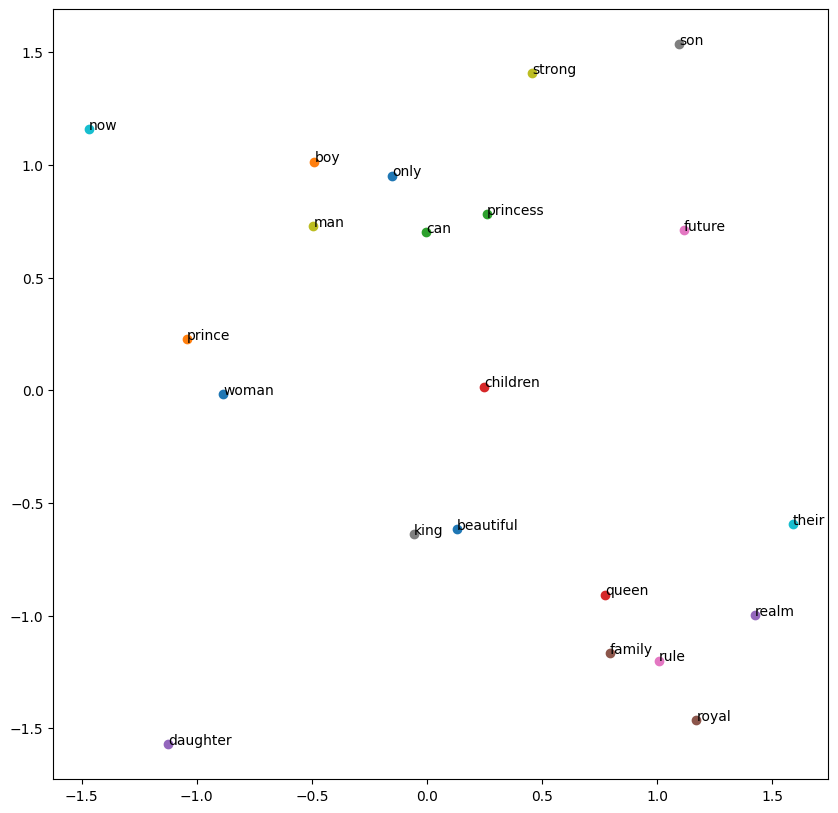

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
  coord = embedding_dict.get(word)
  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))

#TASK Different Dataset with window size = 4

In [ ]:
# Reading the text from the input folder

import pandas as pd
texts = pd.read_csv('text.csv', encoding='ISO-8859-1')
texts = [x for x in texts['text']]
# Defining the window for context
window = 16

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text):
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])


print(word_lists)

unique_word_dict = create_unique_word_dict(all_text)
print(unique_word_dict)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

print("As explained earlier: 6th index for future",X[0])
print("As explained earlier: 7th index for King",Y[0])

# Converting the matrices into an array
X = np.asarray(X)
Y = np.asarray(Y)

print(X)
print("Take all the encodings of and convert it into a matrix such that each row represents an encoding for the word_list")
print("so Second last row would be for (boy,man) which is why for X:Focus you get 1 at index 1 in the dictionary")

[['i', 'love'], ['i', 'pizza'], ['love', 'pizza'], ['love', 'i'], ['pizza', 'love'], ['pizza', 'i'], ['my', 'cat'], ['my', 'very'], ['my', 'cute'], ['cat', 'very'], ['cat', 'my'], ['cat', 'cute'], ['very', 'cute'], ['very', 'cat'], ['very', 'my'], ['cute', 'very'], ['cute', 'cat'], ['cute', 'my'], ['she', 'enjoys'], ['she', 'reading'], ['she', 'books'], ['enjoys', 'reading'], ['enjoys', 'she'], ['enjoys', 'books'], ['reading', 'books'], ['reading', 'enjoys'], ['reading', 'she'], ['books', 'reading'], ['books', 'enjoys'], ['books', 'she'], ['ocean', 'so'], ['ocean', 'vast'], ['ocean', 'beautiful'], ['so', 'vast'], ['so', 'ocean'], ['so', 'beautiful'], ['vast', 'beautiful'], ['vast', 'so'], ['vast', 'ocean'], ['beautiful', 'vast'], ['beautiful', 'so'], ['beautiful', 'ocean'], ['we', 'went'], ['we', 'hiking'], ['we', 'mountains'], ['went', 'hiking'], ['went', 'we'], ['went', 'mountains'], ['hiking', 'mountains'], ['hiking', 'went'], ['hiking', 'we'], ['mountains', 'hiking'], ['mountains',

202it [00:00, 60865.62it/s]

As explained earlier: 6th index for future [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
As explained earlier: 7th index for King [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Take all the encodings of and convert it into a matrix such that each row represents an encoding for the word_list
so Second last row would be for (boy,man) which is why for X:Focus you get 1 at index 1 in the dictionary


Embedded Size =4, Batch_Size = 128, Epochs=1000

In [ ]:
# Deep learning:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Optimizing the network weights
model.fit(
    x=X,
    y=Y,
    batch_size=128,
    epochs=1000
)



# Obtaining the weights from the neural network.
# These are the so called word embeddings

# The input layer
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and
# the value is the numeric vector
embedding_dict = {}
for word in words:
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

Epoch 1/1000
2/2 [==============================] - 1s 8ms/step - loss: 4.1473
Epoch 2/1000
2/2 [==============================] - 0s 9ms/step - loss: 4.1463
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 4.1453
Epoch 4/1000
2/2 [==============================] - 0s 9ms/step - loss: 4.1444
Epoch 5/1000
2/2 [==============================] - 0s 10ms/step - loss: 4.1435
Epoch 6/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.1427
Epoch 7/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.1419
Epoch 8/1000
2/2 [==============================] - 0s 7ms/step - loss: 4.1410
Epoch 9/1000
2/2 [==============================] - 0s 7ms/step - loss: 4.1402
Epoch 10/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.1394
Epoch 11/1000
2/2 [==============================] - 0s 9ms/step - loss: 4.1385
Epoch 12/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.1377
Epoch 13/1000
2/2 [=============================

Please Note that I tried my best to remove as much stopwords as possible in this dataset but it can be improved further if more stopwords are carefully removed in the preprocessing such as they their etc.

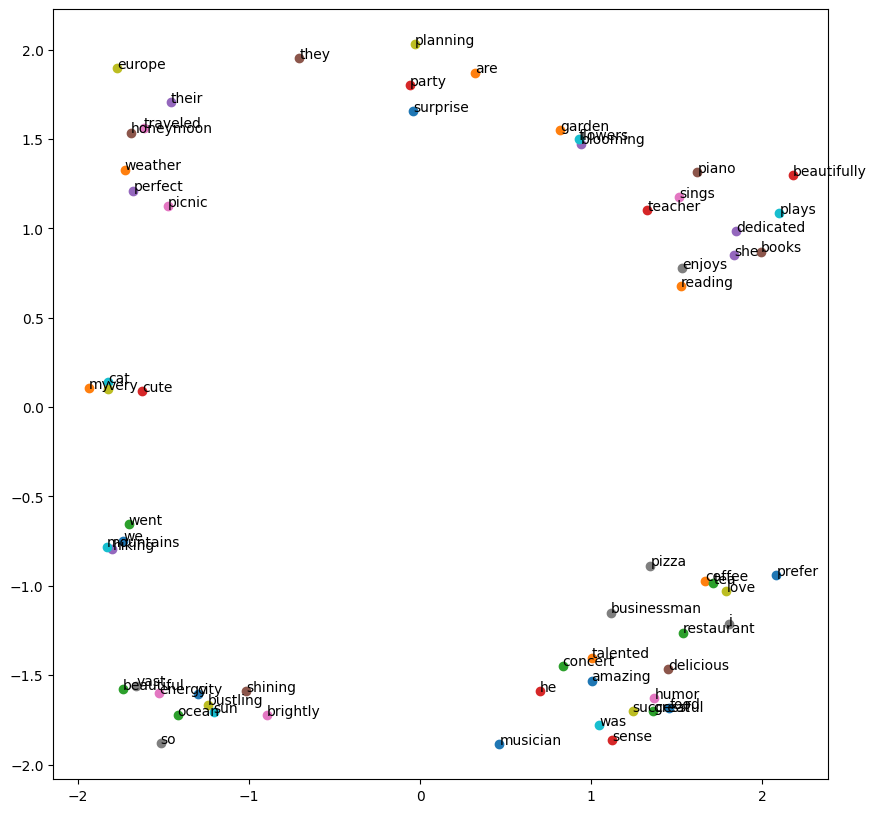

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
  coord = embedding_dict.get(word)
  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))